In [82]:
import pandas as pd
import matplotlib.pyplot as plt


In [107]:
df = pd.read_csv('titanic.csv')

In [108]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [109]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df["Sex"])
df['Embarked']=lb.fit_transform(df["Embarked"])

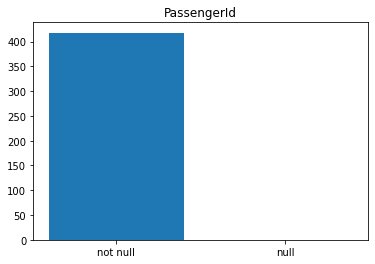

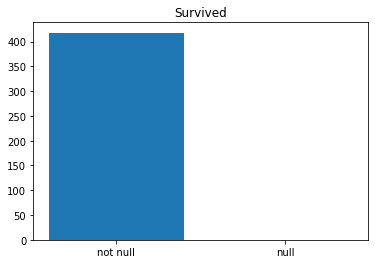

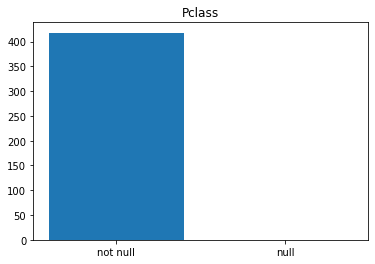

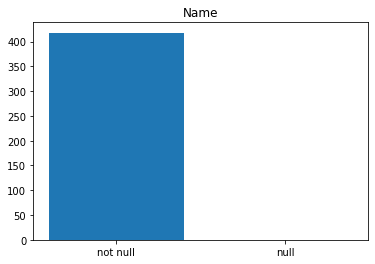

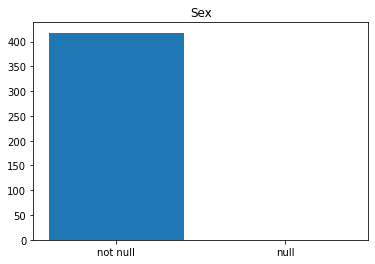

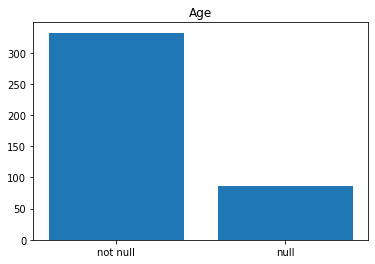

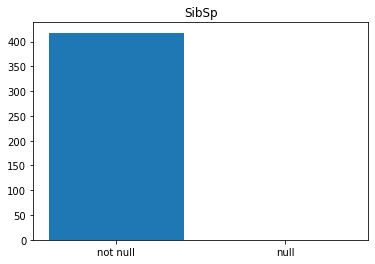

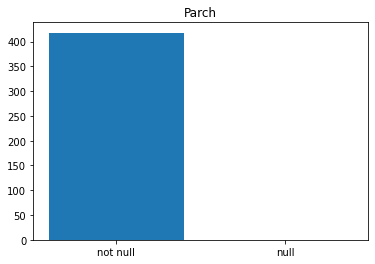

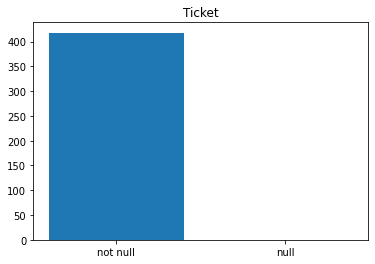

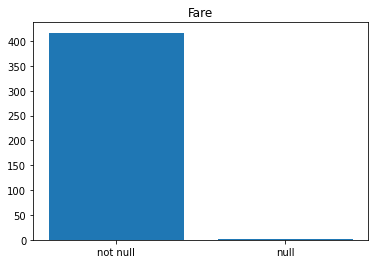

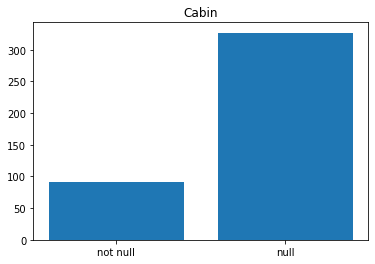

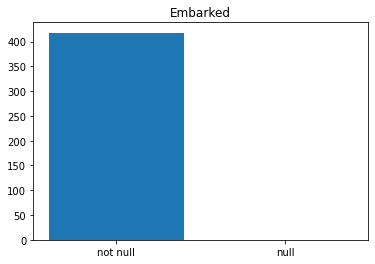

In [110]:
for feature in df.columns:
    fig, ax = plt.subplots()
    ax.bar(['not null', 'null'],[sum(df[feature].notnull()), sum(df[feature].isnull())])
    ax.set_title(feature)

In [111]:
df = df.drop(['Name','Cabin','PassengerId','Ticket'], axis = 1)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [89]:
categorical_features = ['Sex','Pclass','SibSp','Parch']

/home/qba/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/qba/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/qba/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/qba/anacon

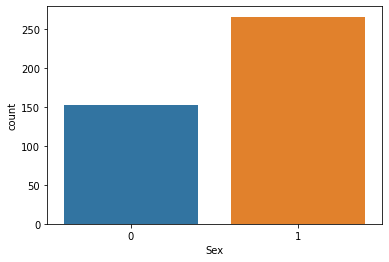

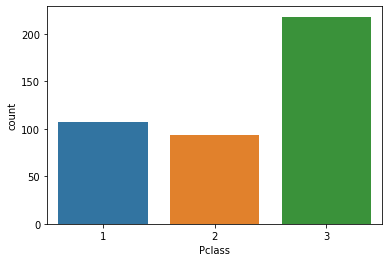

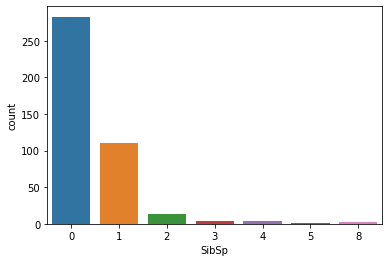

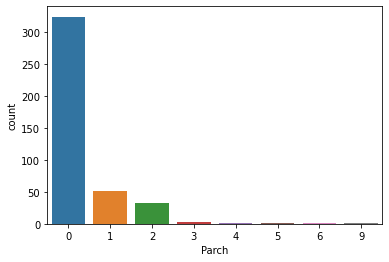

In [90]:
for feature in categorical_features:
    fig, ax = plt.subplots()
    sns.countplot(df[feature],ax = ax)

/home/qba/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

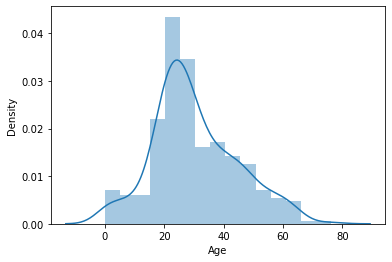

In [91]:
sns.distplot(df.Age)

/home/qba/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

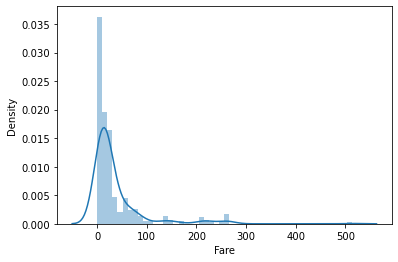

In [92]:
sns.distplot(df.Fare)

In [93]:
sns.heatmap(df.drop('PassengerId', axis = 1).corr())

KeyError: "['PassengerId'] not found in axis"

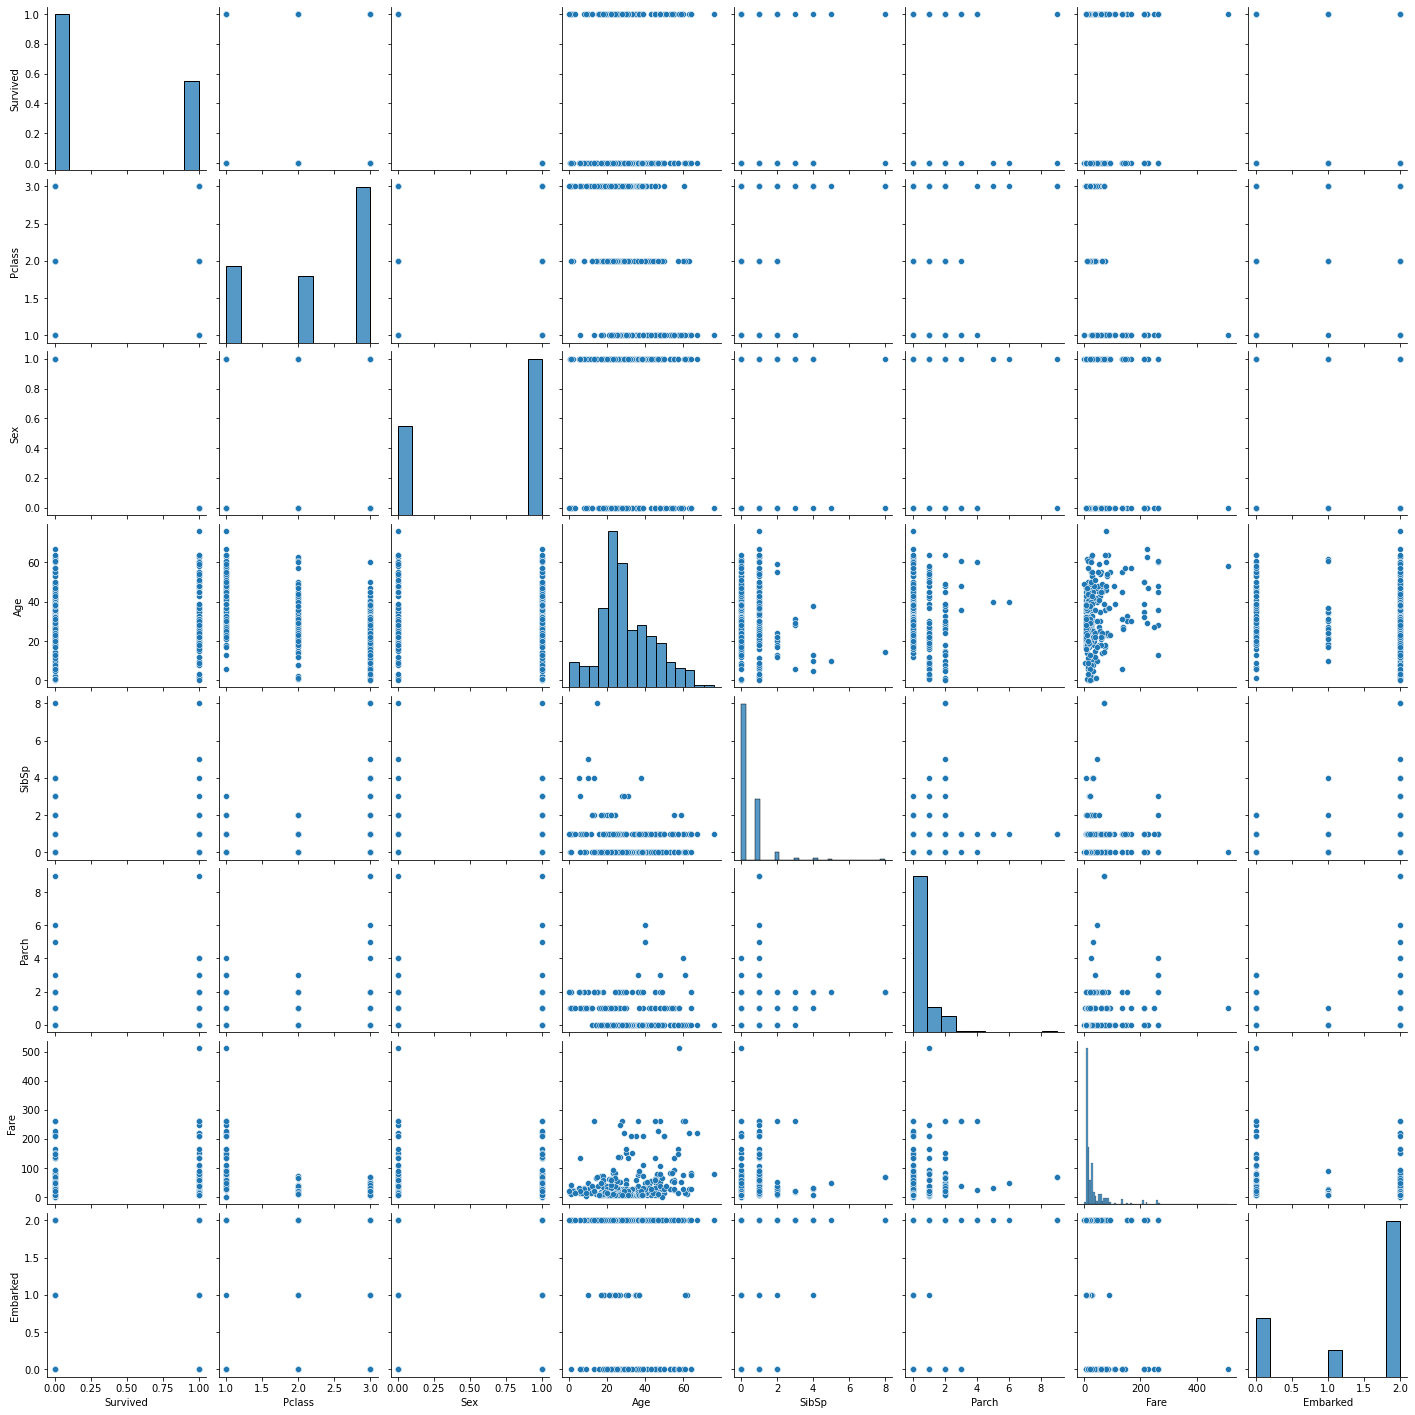

In [94]:
sns.pairplot(df)

In [96]:
nans = df.isna().sum().sort_values(ascending=False)
missing_data = pd.concat([nans], axis=1, keys=["Total"])
missing_data

,Total
Age,86
Fare,1
Embarked,0
Ticket,0
Parch,0
SibSp,0
Sex,0
Pclass,0
Survived,0


In [113]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [114]:
nans = df.isna().sum().sort_values(ascending=False)
missing_data = pd.concat([nans], axis=1, keys=["Total"])
missing_data

,Total
Embarked,0
Fare,0
Parch,0
SibSp,0
Age,0
Sex,0
Pclass,0
Survived,0


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis = 1), df.Survived, stratify = df.Survived)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [120]:
forest.score(X_train, y_train)

1.0

In [121]:
forest.score(X_test, y_test)

1.0

<BarContainer object of 7 artists>

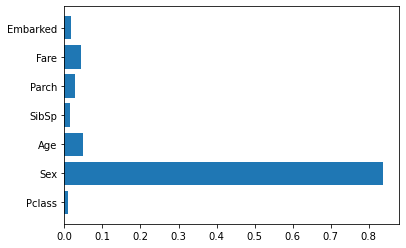

In [123]:
plt.barh(X_train.columns, forest.feature_importances_)